## Customer Attrition

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [2]:
#### Importing DataSet

In [3]:
os.chdir("C:/Users/vjred/Google Drive/MSSDS/SEM III/Statistical Consulting/Project/")

t = pd.read_csv("TCC.csv")
t.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#### Checking the shape of the dataset

In [5]:
t.shape
print ("Rows     : " ,t.shape[0])
print ("Columns  : " ,t.shape[1])
print ("Features : \n" ,t.columns.tolist())
print ("Missing values :  ", t.isnull().sum().values.sum())
print ("Unique values in each Feature :  \n",t.nunique())

Rows     :  7043
Columns  :  21
Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values :   0
Unique values in each Feature :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
print(type(t["TotalCharges"][1]))

<class 'str'>


In [7]:
#### Replacing missing values with NAN's for TotalCharges

In [8]:
t['TotalCharges'] = t["TotalCharges"].replace(" ",np.nan)
t = t[t["TotalCharges"].notnull()]
t = t.reset_index()[t.columns]

In [9]:
t["TotalCharges"] = t["TotalCharges"].astype(float)

print(type(t["TotalCharges"][1]))

<class 'numpy.float64'>


In [10]:
for col in t:
    print(col, t[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [11]:
#### Replacing No Internet Service by No

In [12]:
to_replace = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

for col in to_replace : 
    t[col]  = t[col].replace({'No internet service' : 'No'})

t["SeniorCitizen"] = t["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [13]:
#### Converting Tenure to Categorical

In [14]:
def buckets(df) :
    
    if df["tenure"] <= 12 :
        return "0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "48-60"
    elif df["tenure"] > 60 :
        return ">60"
    

In [15]:
t["tenure_bucket"] = t.apply(lambda t:buckets(t),axis = 1)
t.drop("tenure", axis=1, inplace=True)

In [16]:
#### Between 0-12 months and 12-24 months, there have been many people who churned as compared to other catregories
#### Customer who have churned also have higher spend across all categories 

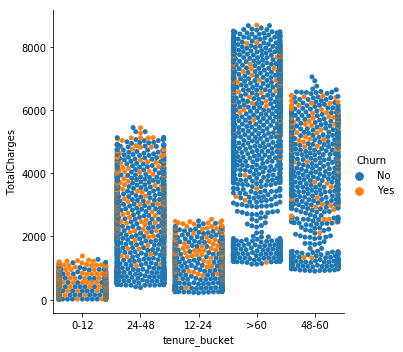

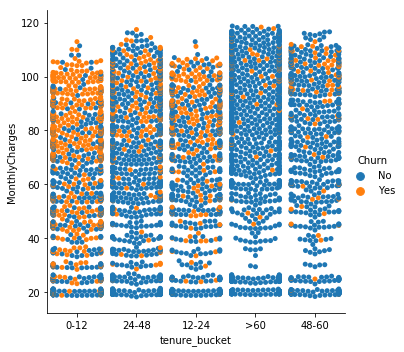

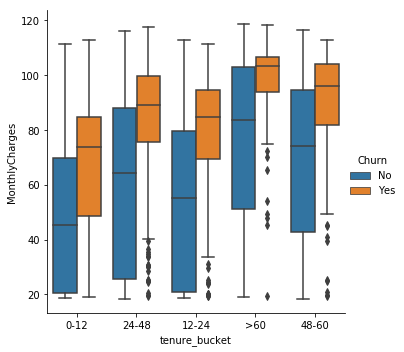

In [17]:
sns.catplot(x="tenure_bucket", y="TotalCharges", hue="Churn", kind="swarm", data=t)
sns.catplot(x="tenure_bucket", y="MonthlyCharges", hue="Churn", kind="swarm", data=t)
sns.catplot(x="tenure_bucket", y="MonthlyCharges", hue="Churn", kind="box", data=t)

In [18]:
#### Seperating categorical and numerical variables

In [19]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = t.nunique()[t.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in t.columns if x not in cat_cols + Id_col]

In [20]:
#### Creating Dummy Variables and concatenating categorical and continuous variables

In [21]:
df1 = t[cat_cols]
df2 = t[num_cols]

categorical_df = pd.get_dummies(df1, drop_first=True)

new_df = pd.concat([categorical_df,df2], axis=1)
new_df.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48-60,tenure_bucket_>60,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,29.85,29.85,No
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,56.95,1889.50,No
2,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,53.85,108.15,Yes
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,70.70,151.65,Yes


In [22]:
new_df.shape

(7032, 28)

In [23]:
new_df["Churn"] = new_df["Churn"].replace({"Yes":1,"No":0})
new_df.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48-60,tenure_bucket_>60,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,29.85,29.85,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,56.95,1889.50,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,53.85,108.15,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,70.70,151.65,1


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

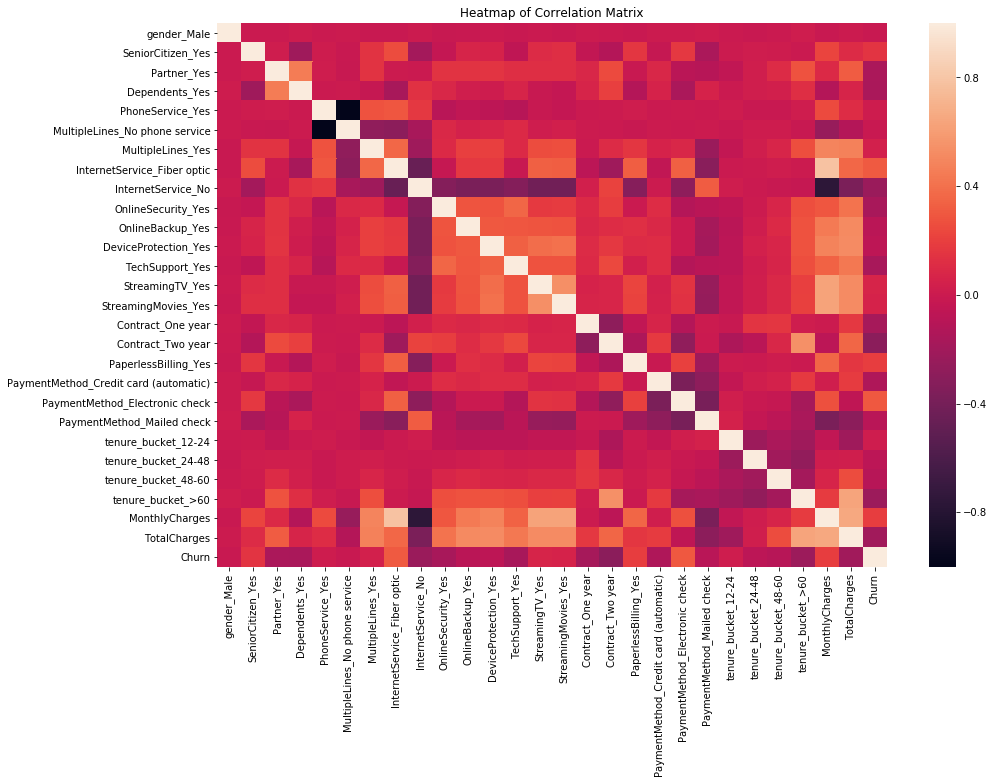

In [24]:
corr = new_df.corr()
corr

f, axes = plt.subplots(ncols=1, figsize=(15,10))


corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, ax = axes)
plt.title('Heatmap of Correlation Matrix')

Text(0, 0.5, 'Customers')

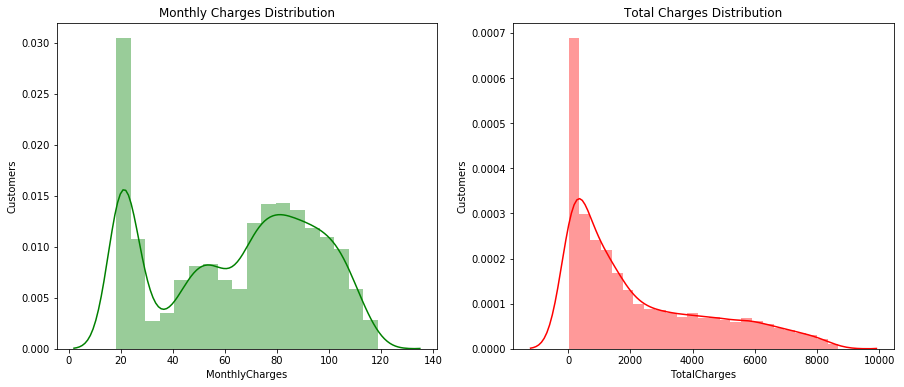

In [25]:
#setup the matplotlib
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

#Graph Employee Satisfaction 
sns.distplot(new_df.MonthlyCharges, kde=True, color="g", ax=axes[0]).set_title('Monthly Charges Distribution')
axes[0].set_ylabel('Customers')

#Graph Employee Evaluation 
sns.distplot(new_df.TotalCharges, kde=True, color="r", ax=axes[1]).set_title('Total Charges Distribution')
axes[1].set_ylabel('Customers')

In [26]:
#rate of Churn of the company 
Churn_rate = new_df.Churn.value_counts()/new_df.shape[0]
Churn_rate

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [27]:
#Creating training and test datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve
from scipy.stats import boxcox
# Create the X and y set
X = new_df.iloc[:,0:27]
Y = new_df.iloc[:,27]
X.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48-60,tenure_bucket_>60,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,29.85,29.85
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,56.95,1889.50
2,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,53.85,108.15
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,70.70,151.65


#### Box-Cox Transformation for the two continuous variables

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48-60,tenure_bucket_>60,TotalCharges,MonthlyCharges_new
0,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,29.85,8.927031
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1889.50,13.093045
2,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,108.15,12.676512
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1840.75,11.007690
4,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,151.65,14.816658


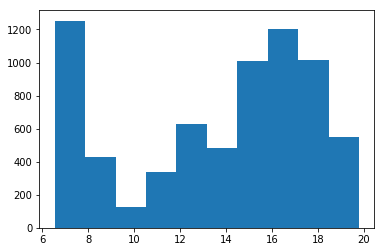

In [28]:
MonthlyCharges = X.iloc[:,25]
a = boxcox(MonthlyCharges, 0.5)
plt.hist(a)
a = pd.DataFrame(a,columns = ['MonthlyCharges_new'])

X = pd.concat([X.iloc[:,0:27],a], axis=1)
X.drop(['MonthlyCharges'], axis=1, inplace=True)
X.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48-60,tenure_bucket_>60,MonthlyCharges_new,TotalCharges_new
0,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,8.927031,8.927031
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,13.093045,84.936759
2,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,12.676512,18.799038
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,11.007690,83.807925
4,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,14.816658,22.629251


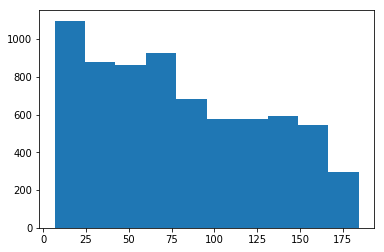

In [29]:
TotalCharges = X.iloc[:,25]
b = boxcox(TotalCharges,0.5)
plt.hist(b)
b = pd.DataFrame(b,columns = ['TotalCharges_new'])

X = pd.concat([X.iloc[:,0:27],b], axis=1)
X.drop(['TotalCharges'], axis=1, inplace=True)
X.head()

#### Splitting into test and trian dataset

In [30]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\vjred\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vjred\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vjred\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys


In [31]:
# Balancing datasets based on different sampling techniques
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_sm, Y_train_sm = sm.fit_sample(X_train, Y_train)


# Upsample minority class
X_train_u, Y_train_u = resample(X_train[Y_train == 1],
                                Y_train[Y_train == 1],
                                replace=True,
                                n_samples=X_train[Y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[Y_train == 0], X_train_u))
Y_train_u = np.concatenate((Y_train[Y_train == 0], Y_train_u))


# Downsample majority class
X_train_d, Y_train_d = resample(X_train[Y_train == 0],
                                Y_train[Y_train == 0],
                                replace=True,
                                n_samples=X_train[Y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[Y_train == 1], X_train_d))
Y_train_d = np.concatenate((Y_train[Y_train == 1], Y_train_d))


print("Original shape:", X_train.shape, Y_train.shape)
print ("Upsampled SMOTE shape:", X_train_sm.shape, Y_train_sm.shape)
print("Upsampled shape:", X_train_u.shape, Y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, Y_train_d.shape)

Original shape: (5625, 27) (5625,)
Upsampled SMOTE shape: (8234, 27) (8234,)
Upsampled shape: (8234, 27) (8234,)
Downsampled shape: (3016, 27) (3016,)


In [32]:
# Part 2 - Now let's make the ANN!
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 14, init = 'uniform', activation = 'relu', input_dim = 27))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 14, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
accuracy_score(Y_test,y_pred)


print ("\n\n ---ANN Model---")
ann_auc = roc_auc_score(Y_test, classifier.predict(X_test)[:,0])
ann_auc

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\vjred\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=27, units=14, kernel_initializer="uniform")`
  
C:\Users\vjred\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=14, kernel_initializer="uniform")`
C:\Users\vjred\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
C:\Users\vjred\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
5625/5625 [==============================] - 1s 206us/step - loss: 0.4911 - acc: 0.7316
Epoch 2/100
5625/5625 [==============================] - 1s 127us/step - loss: 0.4350 - acc: 0.7964
Epoch 3/100
5625/5625 [==============================] - 1s 116us/step - loss: 0.4267 - acc: 0.8007
Epoch 4/100
5625/5625 [==============================] - 1s 110us/step - loss: 0.4202 - acc: 0.8037
Epoch 5/100
5625/5625 [==============================] - 1s 111us/step - loss: 0.4166 - acc: 0.8064
Epoch 6/100
5625/5625 [==============================] - 1s 112us/step - loss: 0.4132 - acc: 0.8055
Epoch 7/100
5625/5625 [==============================] - 1s 113us/step - loss: 0.4119 - acc: 0.8094
Epoch 8/100
5625/5625 [==============================] - 1s 113us/step - loss: 0.4098 - acc: 0.8068
Epoch 9/100
5625/5625 [==============================] - 1s 116us/step - loss: 0.4077 - acc: 0.8121
Epoch 10/100
5625/5625 [==============================] - 1s 112us/step - loss: 0.4071 - acc: 0.8117

5625/5625 [==============================] - 1s 106us/step - loss: 0.3667 - acc: 0.8409
Epoch 83/100
5625/5625 [==============================] - 1s 103us/step - loss: 0.3656 - acc: 0.8386
Epoch 84/100
5625/5625 [==============================] - 1s 107us/step - loss: 0.3667 - acc: 0.8388
Epoch 85/100
5625/5625 [==============================] - 1s 108us/step - loss: 0.3662 - acc: 0.8386
Epoch 86/100
5625/5625 [==============================] - 1s 104us/step - loss: 0.3646 - acc: 0.8386
Epoch 87/100
5625/5625 [==============================] - 1s 102us/step - loss: 0.3661 - acc: 0.8386
Epoch 88/100
5625/5625 [==============================] - 1s 106us/step - loss: 0.3654 - acc: 0.8404
Epoch 89/100
5625/5625 [==============================] - 1s 111us/step - loss: 0.3655 - acc: 0.8373
Epoch 90/100
5625/5625 [==============================] - 1s 103us/step - loss: 0.3654 - acc: 0.8395
Epoch 91/100
5625/5625 [==============================] - 1s 103us/step - loss: 0.3654 - acc: 0.8382
Epo

0.8265321525611353

In [33]:
# Applying Logistic regression on CV of different sampled data

from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, Y_train),
                "SMOTE":(X_train_sm, Y_train_sm),
                "Upsampled": (X_train_u, Y_train_u),
                "Downsampled": (X_train_d, Y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used

for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=10, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
print("Cross validation score: ",cross_val_score(LogisticRegression(class_weight='balanced'), X_train, Y_train, cv=10, scoring='f1'))
print("Cross validation score mean: ",cross_val_score(LogisticRegression(class_weight='balanced'), X_train, Y_train, cv=10, scoring='f1').mean())

# ROC results on smote sampling data with logistic regression

from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve

lr = LogisticRegression()

# Fit the Model to the Upsampling data
lr = lr.fit(X_train_sm, Y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(Y_test, lr.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(Y_test, lr.predict(X_test)))

The best F1 Score for Original data:
0.5861115204969095
The best F1 Score for SMOTE data:
0.7819054985068301
The best F1 Score for Upsampled data:
0.7663677720622714
The best F1 Score for Downsampled data:
0.7536099662121224
Cross validation score:  [0.65809769 0.63589744 0.64415584 0.63101604 0.64361702 0.56533333
 0.62234043 0.63020833 0.60055096 0.62108262]
Cross validation score mean:  0.6252299707954476


 ---Logistic Regression Model---
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.91      0.75      0.83      1046
           1       0.52      0.79      0.63       361

   micro avg       0.76      0.76      0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.78      1407



In [34]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
dt = dt.fit(X_train_sm, Y_train_sm)
    
##Training Classification error
Y_pred = dt.predict(X_train_sm)
accuracy_score(Y_train_sm,Y_pred)

##Validation Classification error
Y_pred = dt.predict(X_test)
accuracy_score(Y_test,Y_pred)

dt_result = cross_val_score(dt, X_train_sm, Y_train_sm, cv=10, scoring='f1')

dt_result
print(dt_result.mean())

print ("\n\n ---Decision Tree Model---")
dt_auc = roc_auc_score(Y_test, dt.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_auc)
print(classification_report(Y_test, dt.predict(X_test)))

0.7946654370066657


 ---Decision Tree Model---
Decision Tree AUC = 0.67
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1046
           1       0.48      0.55      0.51       361

   micro avg       0.73      0.73      0.73      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.73      0.74      1407



In [35]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(criterion='gini', max_depth = 10, max_features = 'sqrt',
                            min_samples_leaf = 1, min_samples_split = 3, 
                            n_estimators = 9, random_state=1)
rf = rf.fit(X_train_sm, Y_train_sm)

hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

grid = GridSearchCV(rf,param_grid=hyperparameters,scoring = 'f1',
                    cv=10, n_jobs = -1)

grid.fit(X_train_sm, Y_train_sm)

best_params = grid.best_params_
best_score = grid.best_score_

##Training Classification error
Y_pred = rf.predict(X_train_sm)
accuracy_score(Y_train_sm,Y_pred)

##Validation Classification error
Y_pred = rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

rf_result = cross_val_score(rf, X_train_sm, Y_train_sm, cv=9, scoring='f1')

rf_result
print(rf_result.mean())


print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(Y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(Y_test, rf.predict(X_test)))

0.8354444306503919


 ---Random Forest Model---
Random Forest AUC = 0.76
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1046
           1       0.54      0.74      0.63       361

   micro avg       0.77      0.77      0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.81      0.77      0.78      1407



In [36]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB = NB.fit(X_train_sm, Y_train_sm)

##Training Classification error
Y_pred = NB.predict(X_train_sm)
accuracy_score(Y_train_sm,Y_pred)
NB.score(X_train_sm, Y_train_sm)

##Validation Classification accuracy
Y_pred = NB.predict(X_test)
accuracy_score(Y_test,Y_pred)
NB.score(X_test, Y_test)

nb_result = cross_val_score(NB, X_train_sm, Y_train_sm, cv=9, scoring='f1')
nb_result

print(nb_result.mean())


print ("\n\n ---Naive Bayes Model---")
nb_auc = roc_auc_score(Y_test, NB.predict(X_test))
print ("Naive Bayes AUC = %2.2f" % nb_auc)
print(classification_report(Y_test, NB.predict(X_test)))

0.7752560035673708


 ---Naive Bayes Model---
Naive Bayes AUC = 0.76
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1046
           1       0.51      0.80      0.62       361

   micro avg       0.75      0.75      0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [37]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train_sm, Y_train_sm)

from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": list(range(1,20,2)),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'brute', p = 1)
grid = GridSearchCV(knn,param_grid=hyperparameters, scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid.fit(X_train_sm, Y_train_sm)

best_params = grid.best_params_
best_score = grid.best_score_


knn.fit(X_train_sm, Y_train_sm)

##Training Classification error
Y_pred = knn.predict(X_train_sm)
accuracy_score(Y_train_sm,Y_pred)

##Validation Classification accuracy
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

knn_result = cross_val_score(knn, X_train_sm, Y_train_sm, cv=9, scoring='f1')

knn_result
print(knn_result.mean())

print ("\n\n ---KNN Model---")
knn_auc = roc_auc_score(Y_test, knn.predict(X_test))
print ("KNN AUC = %2.2f" % knn_auc)
print(classification_report(Y_test, knn.predict(X_test)))

0.8473908885382907


 ---KNN Model---
KNN AUC = 0.66
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1046
           1       0.46      0.55      0.50       361

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.74      0.72      0.73      1407



In [38]:
# XGBoost Model
from xgboost import XGBClassifier

clf =XGBClassifier(seed=777)
clf.fit(X_train_sm, Y_train_sm)

##Training Classification error
Y_pred = clf.predict(X_train_sm)
accuracy_score(Y_train_sm,Y_pred)

##Validation Classification accuracy
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

clf_result = cross_val_score(clf, X_train_sm, Y_train_sm, cv=9, scoring='f1')

clf_result
print(clf_result.mean())


print ("\n\n ---XGBoost Model---")
clf_auc = roc_auc_score(Y_test, clf.predict(X_test))
print ("XGBoost AUC = %2.2f" % clf_auc)
print(classification_report(Y_test, clf.predict(X_test)))

0.8377177476004287


 ---XGBoost Model---
XGBoost AUC = 0.76
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1046
           1       0.57      0.70      0.63       361

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.81      0.79      0.80      1407



In [39]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC  

svc = SVC(gamma='auto', probability=True)
svc = svc.fit(X_train_sm, Y_train_sm)

##Training Classification error
Y_pred = svc.predict(X_train_sm)
accuracy_score(Y_train_sm,Y_pred)

##Validation Classification accuracy
Y_pred = svc.predict(X_test)
accuracy_score(Y_test,Y_pred)

svc_result = cross_val_score(svc, X_train_sm, Y_train_sm, cv=9, scoring='f1')

svc_result
print(svc_result.mean())


print ("\n\n ---Support Vector machine---")
svc_auc = roc_auc_score(Y_test, svc.predict(X_test))
print ("SVM AUC = %2.2f" % svc_auc)
print(classification_report(Y_test, svc.predict(X_test)))

0.8194473311076472


 ---Support Vector machine---
SVM AUC = 0.76
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1046
           1       0.55      0.71      0.62       361

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.78      0.79      1407



In [40]:

# Create ROC Graph
from sklearn.metrics import roc_curve
ann_fpr, ann_tpr, ann_thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,0])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test, dt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf.predict_proba(X_test)[:,1])
NB_fpr, NB_tpr, NB_thresholds = roc_curve(Y_test, NB.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])
clf_fpr, clf_tpr, clf_thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(Y_test, svc.predict_proba(X_test)[:,1])

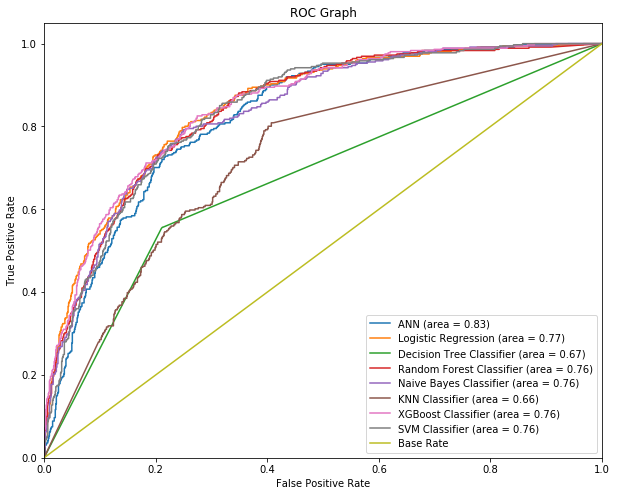

In [41]:
plt.figure(figsize  = [10,8])

# Plot ANN ROC
plt.plot(ann_fpr, ann_tpr, label='ANN (area = %0.2f)' % ann_auc)
# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier (area = %0.2f)' % dt_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
# Plot Naive Bayes ROC
plt.plot(NB_fpr, NB_tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_auc)
# Plot KNN ROC 
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier (area = %0.2f)' % knn_auc)
# Plot XGBoost ROC
plt.plot(clf_fpr, clf_tpr, label='XGBoost Classifier (area = %0.2f)' % clf_auc)
# Plot XGBoost ROC
plt.plot(svc_fpr, svc_tpr, label='SVM Classifier (area = %0.2f)' % svc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()